In [1]:
import pandas as pd
import cpi
from functools import partial
from IPython.core.display import display, HTML
from itertools import chain
# https://taxfoundation.org/federal-tax/individual-income-payroll-taxes/


In [2]:
df = pd.read_csv('fed_individual_rate_history_nominal.csv', index_col=0)
df.columns = ['rate', 'lower', 'upper', 'year', 'tax_type', 'page_num']
df.fillna(1e7, inplace=True)

In [3]:
df['tax_type'].unique()

array(['Jointly', 'Separately', 'Single', 'Head'], dtype=object)

In [4]:

def inflate(row, col='lower'):
    try:
        val = cpi.inflate(row[col], row['year'], to=2018)
    except:
        print(row)
        val = None
    return val

inflate_lower = partial(inflate, col='lower')
inflate_upper = partial(inflate, col='upper')




df['lower_inflation'] = df.apply(inflate_lower, axis=1)
df['upper_inflation'] = df.apply(inflate_upper, axis=1)

rate              1
lower             0
upper         20000
year           1872
tax_type    Jointly
page_num         65
Name: 0, dtype: object
rate              2
lower         20000
upper         50000
year           1872
tax_type    Jointly
page_num         65
Name: 1, dtype: object
rate              3
lower         50000
upper         75000
year           1872
tax_type    Jointly
page_num         65
Name: 2, dtype: object
rate              4
lower         75000
upper        100000
year           1872
tax_type    Jointly
page_num         65
Name: 3, dtype: object
rate              5
lower        100000
upper        250000
year           1872
tax_type    Jointly
page_num         65
Name: 4, dtype: object
rate              6
lower        250000
upper        500000
year           1872
tax_type    Jointly
page_num         65
Name: 5, dtype: object
rate              7
lower        500000
upper         1e+07
year           1872
tax_type    Jointly
page_num         65
Name: 6, dtype: object

In [5]:
df[df['tax_type'] == 'Jointly']

rate   lower       upper  year tax_type  page_num  lower_inflation  \
0   10.0       0     17850.0  2009  Jointly         0         0.000000   
1   15.0   17850     72500.0  2009  Jointly         0     20892.712912   
2   25.0   72500    146400.0  2009  Jointly         0     84858.357766   
3   28.0  146400    223050.0  2009  Jointly         0    171355.359682   
4   33.0  223050    398350.0  2009  Jointly         0    261071.126892   
..   ...     ...         ...   ...      ...       ...              ...   
1   10.0   10000  10000000.0  1962  Jointly        67     83148.013245   
0    3.0     600     10000.0  1963  Jointly        67      4923.666667   
1    5.0   10000  10000000.0  1963  Jointly        67     82061.111111   
0    3.0     600     10000.0  1964  Jointly        67      4860.135484   
1    5.0   10000  10000000.0  1964  Jointly        67     81002.258065   

    upper_inflation  
0      2.089271e+04  
1      8.485836e+04  
2      1.713554e+05  
3      2.610711e+05  
4      4.662528e+05  
..              ...  
1      8.314801e+07  
0      8.206111e+04  
1      8.206111e+07  
0      8.100226e+04  
1      8.100226e+07  

[1985 rows x 8 columns]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.express as px

fig = px.line_3d(df.sort_values(['year','rate']), x="rate", y="lower_inflation", z="upper_inflation", color='year',color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

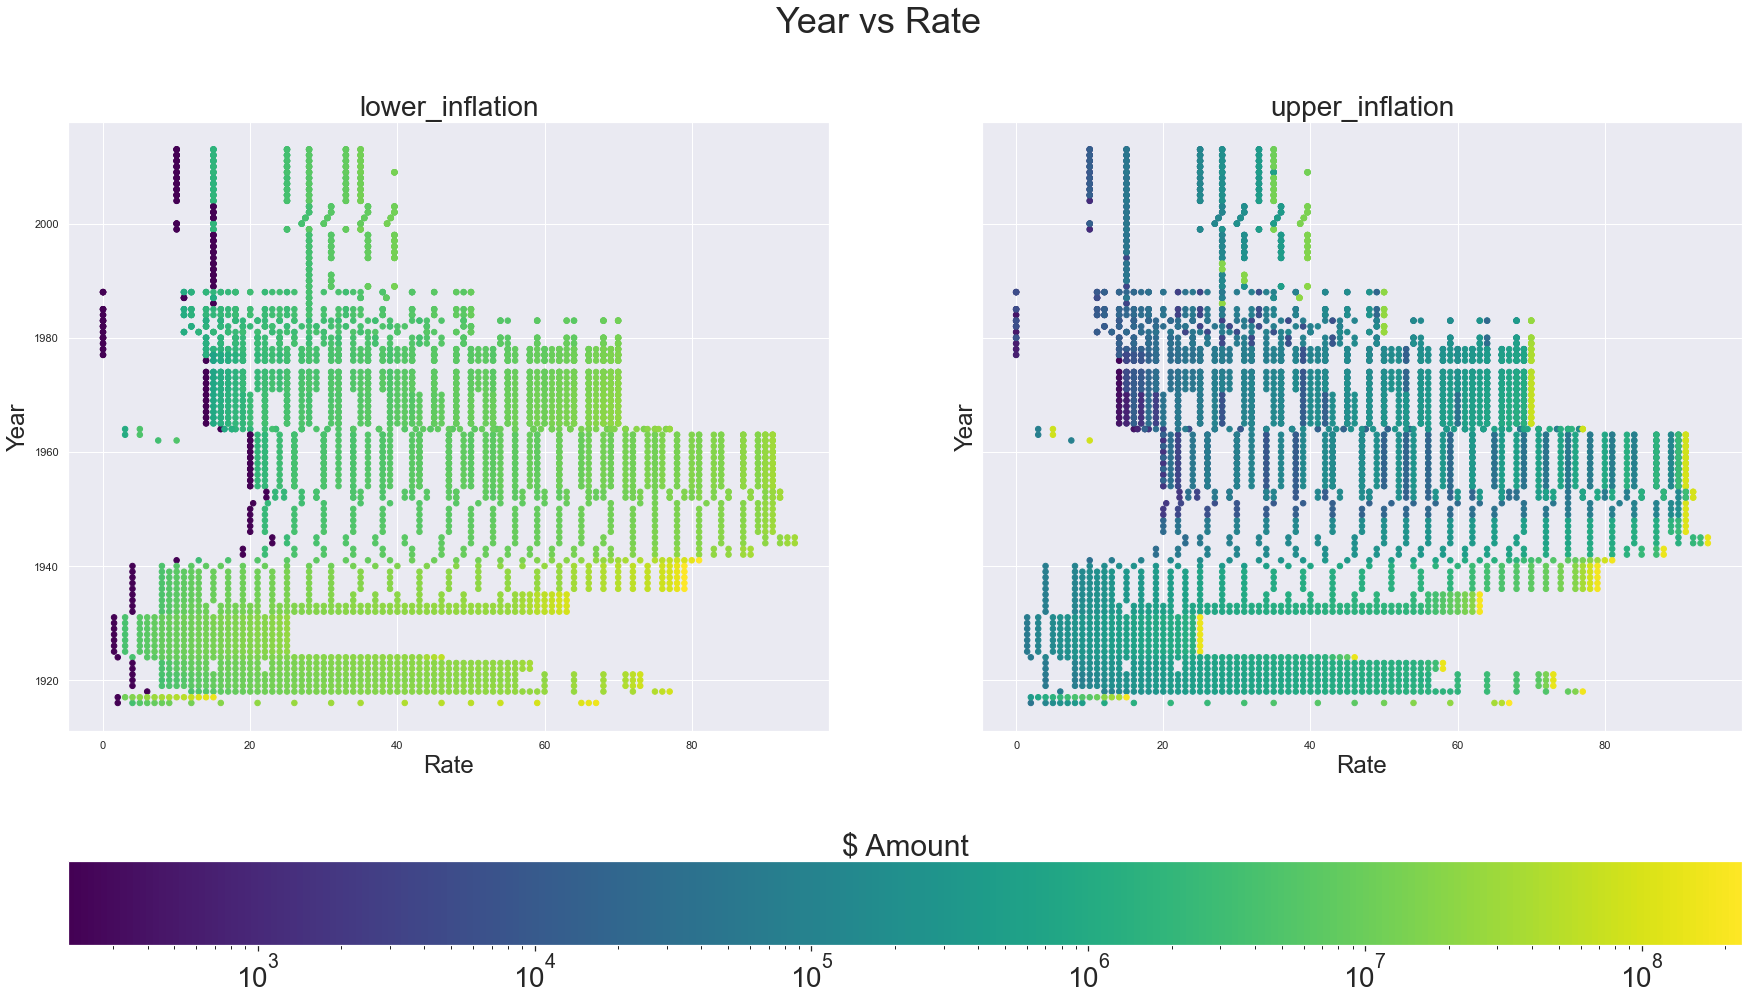

In [7]:
from matplotlib import colors

fig, ax = plt.subplots(1,2, figsize=(30,16), sharey=True)

p = ax[0].scatter(
    df['rate'],
    df['year'], 
    norm=colors.LogNorm(
        vmin=df['lower_inflation'].min()+0.001, 
        vmax=df['lower_inflation'].max()
    ),
    c=df['lower_inflation']+0.001,
    cmap='viridis',
    s=30
)

p = ax[1].scatter(
    df['rate'],
    df['year'], 
    norm=colors.LogNorm(
        vmin=df['upper_inflation'].min()+0.001, 
        vmax=df['upper_inflation'].max()
    ),
    c=df['upper_inflation']+0.001,
    cmap='viridis',
    s=30
)

import matplotlib 
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig.suptitle('Year vs Rate', fontsize=(36))
ax[0].set_title('lower_inflation', fontsize=28)
ax[0].set_xlabel('Rate', fontsize=24)
ax[0].set_ylabel('Year', fontsize=24)
ax[1].set_title('upper_inflation', fontsize=28)
ax[1].set_xlabel('Rate', fontsize=24)
ax[1].set_ylabel('Year', fontsize=24)

cb = fig.colorbar(p, ax=ax, orientation='horizontal')
cb.ax.set_title('$ Amount', fontsize=(30))
cb.ax.tick_params(labelsize=28) 
      
plt.show()

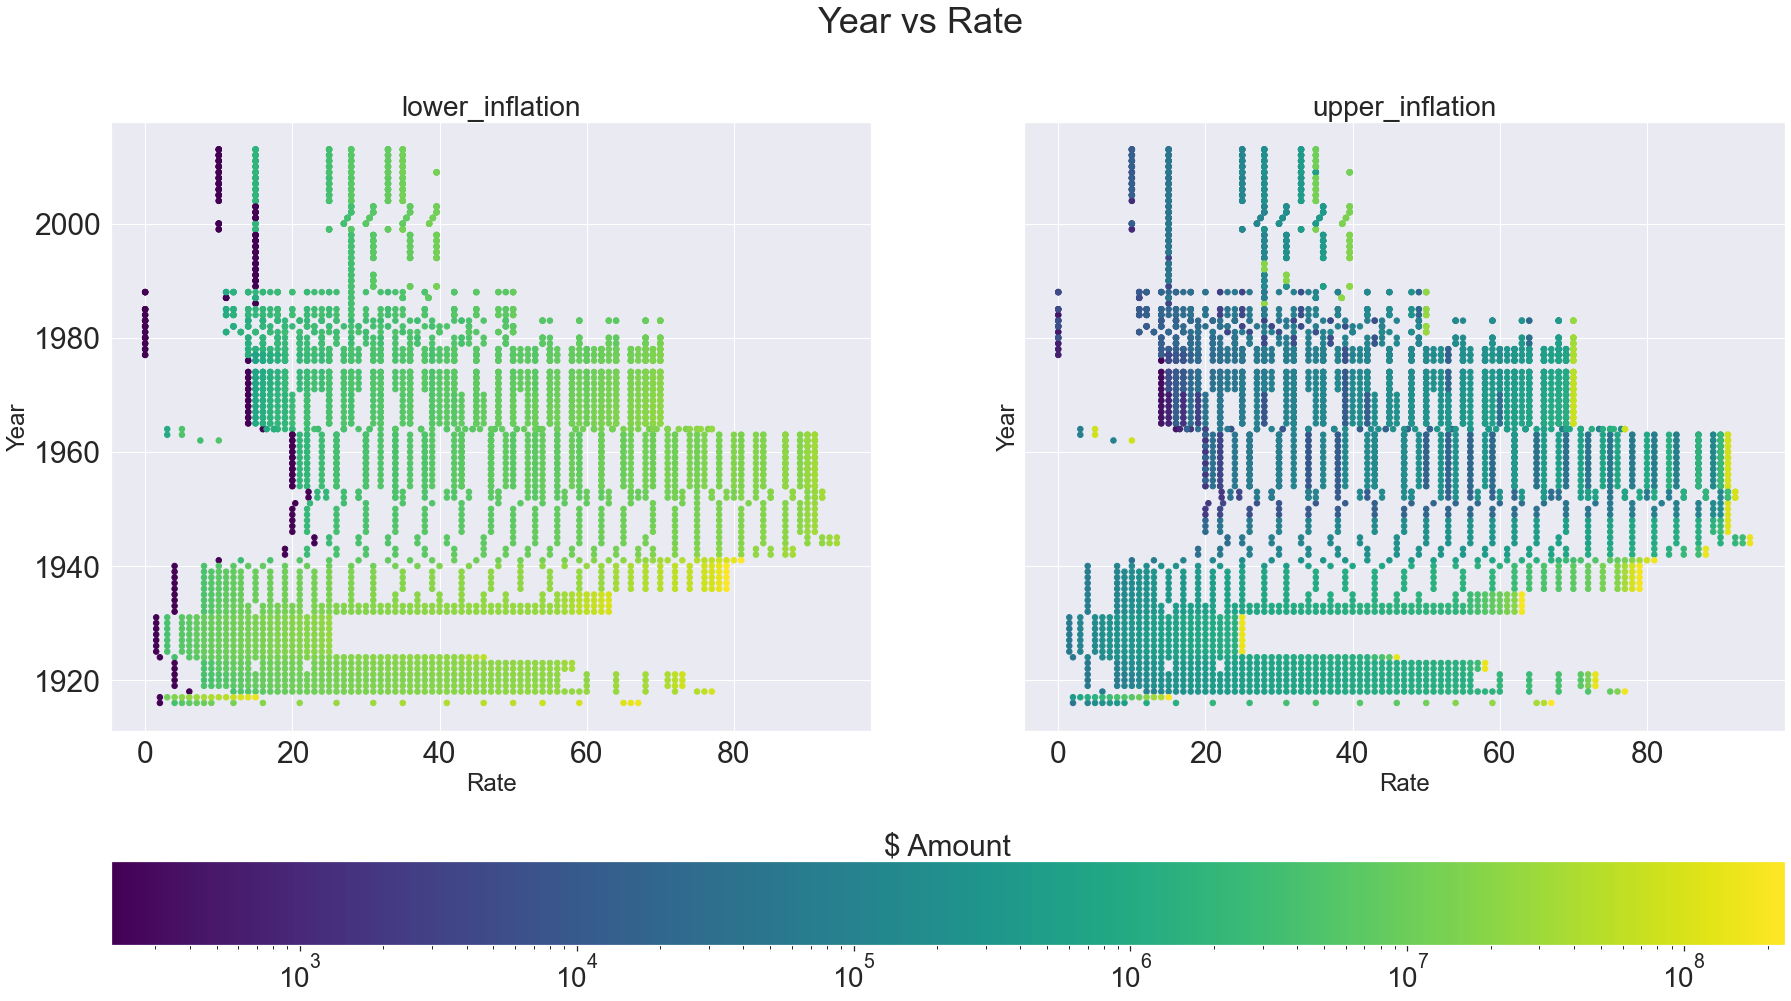

In [8]:
from matplotlib import colors

fig, ax = plt.subplots(1,2, figsize=(30,16), sharey=True)

vcenter = 1e5

p = ax[0].scatter(
    df['rate'],
    df['year'], 
        norm=colors.LogNorm(
        vmin=df['lower_inflation'].min()+0.001, 
        vmax=df['lower_inflation'].max(),
    ),
    c=df['lower_inflation']+0.001,
    cmap='viridis',
    s=30
)

p = ax[1].scatter(
    df['rate'],
    df['year'], 
        norm=colors.LogNorm(
        vmin=df['upper_inflation'].min()+0.001, 
        vmax=df['upper_inflation'].max(),
    ),
    c=df['upper_inflation']+0.001,
    cmap='viridis',
    s=30
)

import matplotlib 
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig.suptitle('Year vs Rate', fontsize=(36))
ax[0].set_title('lower_inflation', fontsize=28)
ax[0].set_xlabel('Rate', fontsize=24)
ax[0].set_ylabel('Year', fontsize=24)
ax[1].set_title('upper_inflation', fontsize=28)
ax[1].set_xlabel('Rate', fontsize=24)
ax[1].set_ylabel('Year', fontsize=24)

cb = fig.colorbar(p, ax=ax, orientation='horizontal')
cb.ax.set_title('$ Amount', fontsize=(30))
cb.ax.tick_params(labelsize=28) 
      
plt.show()

In [9]:
import hiplot as hip

df_to_hip = df[(df['year'] >= 1913)][['year','rate','lower','upper','lower_inflation','upper_inflation']]

hip.Experiment.from_dataframe(df_to_hip).display()


<IPython.core.display.Javascript object>

In [10]:
tax_2013_single = """lower,upper,rate
$0,$8925,10%
$8925,$36250,15%
$36250,$87850,25%
$87850,$183250,28%
$183250,$398350,33%
$398350,$400000,35%
$400000,,39.6%"""

tax_2013_joint= """lower,upper,rate
$0,$17850,10%
$17850,$72500,15%
$72500,$146400,25%
$146400,$223050,28%
$223050,$398350,33%
$398350,$450000,35%
$450000,,39.6%"""

tax_2013_head = """lower,upper,rate
$0,$12750,10%
$12750,$48600,15%
$48600,$125450,25%
$125450,$203150,28%
$203150,$398350,33%
$398350,$425000,35%
$425000,,39.6%"""

tax_2014 = """Rate,Single Filers,,Married Joint Filers,,Head of Household Filers
10%,$0,$9075,$0,$18150,$0,$12950
15%,$9076,$36900,$18151,$73800,$12951,$49400
25%,$36901,$89350,$73801,$148850,$49401,$127550
28%,$89351,$186350,$148851,$226850,$127551,$206600
33%,$186351,$405100,$226851,$405100,$206601,$405100
35%,$405101,$406750,$405101,$457600,$405101,$432200
39.6%,$406751,,$457601,,$432201,,"""

tax_2015 = """Rate,Single Filers,,Married Joint Filers,,Head of Household Filers
10%,$0,$9225,$0,$18450,$0,$13150
15%,$9225,$37450,$18450,$74900,$13150,$50200
25%,$37450,$90750,$74900,$151200,$50200,$129600
28%,$90750,$189300,$151200,$230450,$129600,$209850
33%,$189300,$411500,$230450,$411500,$209850,$411500
35%,$411500,$413200,$411500,$464850,$411500,$439000
39.6%,$413200,,$464850,,$439000,"""

tax_2016 = """Rate,Single Filers,,Married Joint Filers,,Head of Household Filers
10%,$0,$9275,$0,$18550,$0,$13250
15%,$9275,$37650,$18550,$75300,$13250,$50400
25%,$37650,$91150,$75300,$151900,$50400,$130150
28%,$91150,$190150,$151900,$231450,$130150,$210800
33%,$190150,$413350,$231450,$413350,$210800,$413350
35%,$413350,$415050,$413350,$466950,$413350,$441000
39.6%,$415050,,$466950,,$441000,"""

tax_2017_single = """Rate,Taxable Income Bracket,
10%,$0,$9325
15%,$9325,$37950
25%,$37950,$91900
28%,$91900,$191650
33%,$191650,$416700
35%,$416700,$418400
39.60%,$418400,"""

tax_2017_married = """Rate,Taxable Income Bracket,Tax Owed
10%,$0,$18650
15%,$18650,$75900
25%,$75900,$153100
28%,$153100,$233350
33%,$233350,$416700
35%,$416700,$470700
39.60%,$470700,"""

tax_2017_head = """Rate,Taxable Income Bracket,Tax Owed
10%,$0,$13350
15%,$13350,$50800
25%,$50800,$131200
28%,$131200,$212500
33%,$212500,$416700
35%,$416700,$444500
39.60%,$444550,"""

tax_2018 = """Rate,For Unmarried Individuals,For Married Individuals Filing Joint Returns,For Heads of Households
10%,$0,$0,$0
12%,$9525,$19050,$13600
22%,$38700,$77400,$51800
24%,$82500,$165000,$82500
32%,$157500,$315000,$157500
35%,$200000,$400000,$200000
37%,$500000,$600000,$500000"""

tax_2019 = """Rate, For Unmarried Individuals,,For Married Individuals Filing Joint Returns,,For Heads of Households,
10%,$0,$9700,$0,$19400$0,$9700
12%,$9701,$39475,$19401,$78950,$13851,$52850
22%,$39476,$84200,$78951,$168400,$52851,$84200
24%,$84201,$160725,$168401,$321450,$84201,$160700
32%,$$160726,$204100,$321451,$408200,$160701,$204100
35%,$204101,$510300,$408201,$612350,$204101,$510300
37%,$510300,,$612350,,$510300,"""

tax_2020 = """Rate,For Single Individuals,,For Married Individuals Filing Joint Returns,,For Heads of Households
10%,$0,$9875,$0,$19750,$0,$14100
12%,$9876,$40125,$19751,$80250,$14101,$53700
22%,$40126,$85525,$80251,$171050,$53701,$85500
24%,$85526,$163300,$171051,$326600,$85501,$163300
32%,$163301,$207350,$326601,$414700,$163301,$207350
35%,$207351,$518400,$414701,$622050,$207351,$518400
37%,$518401,,$622051,,$518401,"""

tax_2013_to_2020 = list(zip(
    "tax_2013_single, tax_2013_joint, tax_2013_head, tax_2014, tax_2015, tax_2016, tax_2017_single, tax_2017_married, tax_2017_head, tax_2018, tax_2019, tax_2020".split(', '),
    [tax_2013_single, tax_2013_joint, tax_2013_head, tax_2014, tax_2015, tax_2016, tax_2017_single, tax_2017_married, tax_2017_head, tax_2018, tax_2019, tax_2020]
))

In [11]:
new_data = []

# df.columns = ['rate', 'lower', 'upper', 'year', 'tax_type', 'page_num']



for n,t in tax_2013_to_2020:
    tmp_df = pd.DataFrame([r.replace('*','').split(',') for r in t.split('\n')])
  
    if n == 'tax_2013_single':
        tmp_df['tax_type'] = 'Single'
        tmp_df['year'] = 2013
        tmp_df = tmp_df.iloc[1:,[2,0,1,3,4]].apply(lambda x: x.replace('%','').replace('$',''))
        tmp_df.columns = ['rate', 'lower', 'upper', 'tax_type', 'year']
        new_data.append(tmp_df[['rate','lower', 'upper', 'tax_type','year',]])

    elif n == 'tax_2017_single':
        tmp_df['tax_type'] = 'Single'
        tmp_df['year'] = 2017
        tmp_df = tmp_df.iloc[1:,[0,1,2,3,4]].apply(lambda x: x.replace('%','').replace('$',''))
        tmp_df.columns = ['rate', 'lower', 'upper', 'tax_type', 'year']
        new_data.append(tmp_df[['rate','lower', 'upper', 'tax_type','year',]])
        
    elif n == 'tax_2017_married':
        tmp_df['tax_type'] = 'Jointly'
        tmp_df['year'] = 2017
        tmp_df = tmp_df.iloc[1:,[0,1,2,3,4]].apply(lambda x: x.replace('%','').replace('$',''))
        tmp_df.columns = ['rate', 'lower', 'upper', 'tax_type', 'year']
        new_data.append(tmp_df[['rate','lower', 'upper', 'tax_type','year',]])
        
    elif n == 'tax_2017_head':
        tmp_df['tax_type'] = 'Head'
        tmp_df['year'] = 2017
        tmp_df = tmp_df.iloc[1:,[0,1,2,3,4]].apply(lambda x: x.replace('%','').replace('$',''))
        tmp_df.columns = ['rate', 'lower', 'upper', 'tax_type', 'year']
        new_data.append(tmp_df[['rate','lower', 'upper', 'tax_type','year',]])
        
        
    elif n == 'tax_2013_joint':
        tmp_df['tax_type'] = 'Jointly'
        tmp_df['year'] = 2013
        tmp_df = tmp_df.iloc[1:,[2,0,1,3,4]].apply(lambda x: x.replace('%','').replace('$',''))
        tmp_df.columns = ['rate', 'lower', 'upper', 'tax_type', 'year']
        new_data.append(tmp_df[['rate','lower', 'upper', 'tax_type','year',]])

    elif n == 'tax_2013_head':
        tmp_df['tax_type'] = 'Head'
        tmp_df['year'] = 2013
        tmp_df = tmp_df.iloc[1:,[2,0,1,3,4]].apply(lambda x: x.replace('%','').replace('$',''))
        tmp_df.columns = ['rate', 'lower', 'upper', 'tax_type', 'year']
        new_data.append(tmp_df[['rate','lower', 'upper', 'tax_type','year',]])
        
        
    elif n in ['tax_2014', 'tax_2015', 'tax_2016', 'tax_2019', 'tax_2020']:
        tmp_df['year'] = int(n.split('_')[-1])
        single = tmp_df.iloc[1:,[0,1,2,7]].apply(lambda x: x.replace('%','').replace('$',''))
        single.columns = ['rate','lower', 'upper', 'year']
        single['tax_type'] = 'Single'
        new_data.append(single[['rate','lower', 'upper', 'tax_type','year',]])
        
        joint = tmp_df.iloc[1:,[0,3,4,7]].apply(lambda x: x.replace('%','').replace('$',''))
        joint.columns = ['rate','lower', 'upper', 'year']
        joint['tax_type'] = 'Jointly'
        new_data.append(joint[['rate','lower', 'upper', 'tax_type','year',]])
        
        head = tmp_df.iloc[1:,[0,5,6,7]].apply(lambda x: x.replace('%','').replace('$',''))
        head.columns = ['rate','lower', 'upper', 'year']
        head['tax_type'] = 'Head'
        new_data.append(head[['rate','lower', 'upper', 'tax_type','year',]])
        
    elif n == 'tax_2018':
        tmp_df['year'] = 2018

        
        single = tmp_df.iloc[1:,[0,1,4]]
        single['t'] = list(chain(tmp_df.iloc[:,1].values[2:], [None]))
        single.columns = ['rate', 'lower', 'year', 'upper']
        single['tax_type'] = 'Single'
        
        joint = tmp_df.iloc[1:,[0,2,4]]
        joint['t'] = list(chain(tmp_df.iloc[:,2].values[2:], [None]))
        joint.columns = ['rate', 'lower', 'year', 'upper']
        joint['tax_type'] = 'Jointly'

        head = tmp_df.iloc[1:,[0,3,4]]
        head['t'] = list(chain(tmp_df.iloc[:,3].values[2:], [None]))
        head.columns = ['rate', 'lower', 'year', 'upper']
        head['tax_type'] = 'Head'
       

with pd.option_context("display.max_rows", 1300):
    result = pd.concat(new_data)
    
    display(result)

rate     lower     upper tax_type  year
1     10%        $0     $8925   Single  2013
2     15%     $8925    $36250   Single  2013
3     25%    $36250    $87850   Single  2013
4     28%    $87850   $183250   Single  2013
5     33%   $183250   $398350   Single  2013
6     35%   $398350   $400000   Single  2013
7   39.6%   $400000             Single  2013
1     10%        $0    $17850  Jointly  2013
2     15%    $17850    $72500  Jointly  2013
3     25%    $72500   $146400  Jointly  2013
4     28%   $146400   $223050  Jointly  2013
5     33%   $223050   $398350  Jointly  2013
6     35%   $398350   $450000  Jointly  2013
7   39.6%   $450000            Jointly  2013
1     10%        $0    $12750     Head  2013
2     15%    $12750    $48600     Head  2013
3     25%    $48600   $125450     Head  2013
4     28%   $125450   $203150     Head  2013
5     33%   $203150   $398350     Head  2013
6     35%   $398350   $425000     Head  2013
7   39.6%   $425000               Head  2013
1     10%        $0     $9075   Single  None
2     15%     $9076    $36900   Single  None
3     25%    $36901    $89350   Single  None
4     28%    $89351   $186350   Single  None
5     33%   $186351   $405100   Single  None
6     35%   $405101   $406750   Single  None
7   39.6%   $406751             Single      
1     10%        $0    $18150  Jointly  None
2     15%    $18151    $73800  Jointly  None
3     25%    $73801   $148850  Jointly  None
4     28%   $148851   $226850  Jointly  None
5     33%   $226851   $405100  Jointly  None
6     35%   $405101   $457600  Jointly  None
7   39.6%   $457601            Jointly      
1     10%        $0    $12950     Head  None
2     15%    $12951    $49400     Head  None
3     25%    $49401   $127550     Head  None
4     28%   $127551   $206600     Head  None
5     33%   $206601   $405100     Head  None
6     35%   $405101   $432200     Head  None
7   39.6%   $432201               Head      
1     10%        $0     $9225   Single  2015
2     15%     $9225    $37450   Single  2015
3     25%    $37450    $90750   Single  2015
4     28%    $90750   $189300   Single  2015
5     33%   $189300   $411500   Single  2015
6     35%   $411500   $413200   Single  2015
7   39.6%   $413200             Single  2015
1     10%        $0    $18450  Jointly  2015
2     15%    $18450    $74900  Jointly  2015
3     25%    $74900   $151200  Jointly  2015
4     28%   $151200   $230450  Jointly  2015
5     33%   $230450   $411500  Jointly  2015
6     35%   $411500   $464850  Jointly  2015
7   39.6%   $464850            Jointly  2015
1     10%        $0    $13150     Head  2015
2     15%    $13150    $50200     Head  2015
3     25%    $50200   $129600     Head  2015
4     28%   $129600   $209850     Head  2015
5     33%   $209850   $411500     Head  2015
6     35%   $411500   $439000     Head  2015
7   39.6%   $439000               Head  2015
1     10%        $0     $9275   Single  2016
2     15%     $9275    $37650   Single  2016
3     25%    $37650    $91150   Single  2016
4     28%    $91150   $190150   Single  2016
5     33%   $190150   $413350   Single  2016
6     35%   $413350   $415050   Single  2016
7   39.6%   $415050             Single  2016
1     10%        $0    $18550  Jointly  2016
2     15%    $18550    $75300  Jointly  2016
3     25%    $75300   $151900  Jointly  2016
4     28%   $151900   $231450  Jointly  2016
5     33%   $231450   $413350  Jointly  2016
6     35%   $413350   $466950  Jointly  2016
7   39.6%   $466950            Jointly  2016
1     10%        $0    $13250     Head  2016
2     15%    $13250    $50400     Head  2016
3     25%    $50400   $130150     Head  2016
4     28%   $130150   $210800     Head  2016
5     33%   $210800   $413350     Head  2016
6     35%   $413350   $441000     Head  2016
7   39.6%   $441000               Head  2016
1     10%        $0     $9325   Single  2017
2     15%     $9325    $37950   Single  2017
3     25%    $37950    $91900   Single  2017
4     28%    $91900   $191650   Single  2017


In [12]:
import numpy as np

total_df = pd.concat([df[['rate','lower','upper','year','tax_type']], result[['rate','lower','upper','year','tax_type']]])

total_df['rate'] = total_df['rate'].astype(str).str.replace('%','').astype(float)
total_df['lower'] = total_df['lower'].astype(str).str.replace('$','').astype(float)
total_df['upper'] = total_df['upper'].astype(str).str.replace('$','')
total_df['year'] = total_df['year'].astype(str)


total_df.sort_values('year')

rate     lower       upper  year tax_type
7   39.6  432201.0                       Head
7   39.6  457601.0                    Jointly
7   39.6  406751.0                     Single
0    2.5    2000.0  10000000.0  1865  Jointly
0    2.5    2000.0  10000000.0  1866  Jointly
..   ...       ...         ...   ...      ...
3   25.0   36901.0       89350  None   Single
2   15.0    9076.0       36900  None   Single
1   10.0       0.0        9075  None   Single
2   15.0   18151.0       73800  None  Jointly
6   35.0  405101.0      432200  None     Head

[4609 rows x 5 columns]

In [13]:
df.head()

rate   lower     upper  year tax_type  page_num  lower_inflation  \
0  10.0       0   17850.0  2009  Jointly         0         0.000000   
1  15.0   17850   72500.0  2009  Jointly         0     20892.712912   
2  25.0   72500  146400.0  2009  Jointly         0     84858.357766   
3  28.0  146400  223050.0  2009  Jointly         0    171355.359682   
4  33.0  223050  398350.0  2009  Jointly         0    261071.126892   

   upper_inflation  
0     20892.712912  
1     84858.357766  
2    171355.359682  
3    261071.126892  
4    466252.783669

In [43]:
fill_missing = [
    {'lower':1955, 'upper':1970, 'missing':['Single'], 'fill':['Separately'],},
    {'lower':1952,'upper':1954,'missing':['Jointly','Single'],'fill':['Separately']},
    {'lower':1949,'upper':1951,'missing':['Jointly','Single','Head'],'fill':['Separately']},
    {'lower':1862,'upper':1949,'missing':['Separately','Single','Head'],'fill':['Jointly']},
]


In [83]:
total_data_pre_fill = pd.concat([df, result])
is_year = []
for x in total_data_pre_fill['year']:
    try:
        int(x)
        is_year.append(True)
    except:
        is_year.append(False)
        
total_data_pre_fill = total_data_pre_fill[is_year]
total_data_pre_fill['year'] = total_data_pre_fill['year'].astype(int)
        
new_data_to_append = []
for fm in fill_missing:
#     print(fm)
    tmp = total_data_pre_fill[total_data_pre_fill['year'].between(fm['lower'], fm['upper'])]

    for fill in fm['fill']:
        for miss in fm['missing']:
            new_tmp = tmp[tmp['tax_type'] == fill].copy()
            print(fm['lower'], fm['upper'], miss, fill)
            new_tmp['tax_type'] = miss
            new_data_to_append.append(new_tmp)
            
total_data_post_fill = pd.concat([df, result, pd.concat(new_data_to_append)])
is_year = []
for x in total_data_post_fill['year']:
    try:
        if x:
            int(x)
            is_year.append(True)
        else:
            is_year.append(False)
    except:
        is_year.append(False)

total_data_post_fill = total_data_post_fill[is_year]
total_data_post_fill['year'] = total_data_post_fill['year'].astype(int)
total_data_post_fill[total_data_post_fill['year'] >= 1913][['rate','lower','upper','year','tax_type']].sort_values(['year','tax_type','rate']).reset_index(drop=True).to_csv('fed_individual_rate_history_nominal_1913_2020.csv')

1955 1970 Single Separately
1952 1954 Jointly Separately
1952 1954 Single Separately
1949 1951 Jointly Separately
1949 1951 Single Separately
1949 1951 Head Separately
1862 1949 Separately Jointly
1862 1949 Single Jointly
1862 1949 Head Jointly
